In [822]:
from google.colab import drive
drive.mount('/content/drive') # remove the cell if colab is not used

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [823]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
base_path = Path('/content/drive/My Drive/daneSolvro/') # Pass path to data folder here, e.g. Path('/content/drive/MyDrive/data') if using Google Drive

# Analiza i przetwarzanie danych na temat Titanica

#### Wyobraź sobie, że pewnego wakacyjnego dnia, będąc na plaży w pełnym słońcu, odbierasz telefon od nieznanego numeru.
Robisz to niechętnie — zasłużyłeś/aś przecież na odpoczynek i chcesz mieć ten czas tylko dla siebie. Już masz na końcu języka wymijającą odpowiedź, gdy nagle z drugiej strony słyszysz:
„Czy jesteś gotowy, by tego lata rozwikłać jedną z największych zagadek ludzkości?”

Jako osoba z natury ciekawa świata i ze świetnym umysłem analitycznym, szybko zapominasz o plaży i wakacjach. Zaintrygowany/a dopytujesz o szczegóły, ale rozmówca nie chce zdradzić zbyt wiele. Wiadomo jedynie, że chodzi o *zatonięcie Titanica w 1914* roku, a celem misji jest ustalenie, które osoby miały szansę przeżyć.

**Ty** — jako **renomowany analityk danych** — byłeś/byłaś ich pierwszym wyborem do analizy i oczyszczenia danych. Mimo wątpliwości postanawiasz podjąć się zadania, mając nadzieję, że twoja wiedza może zostać praktycznie wykorzystana w słusznym celu.

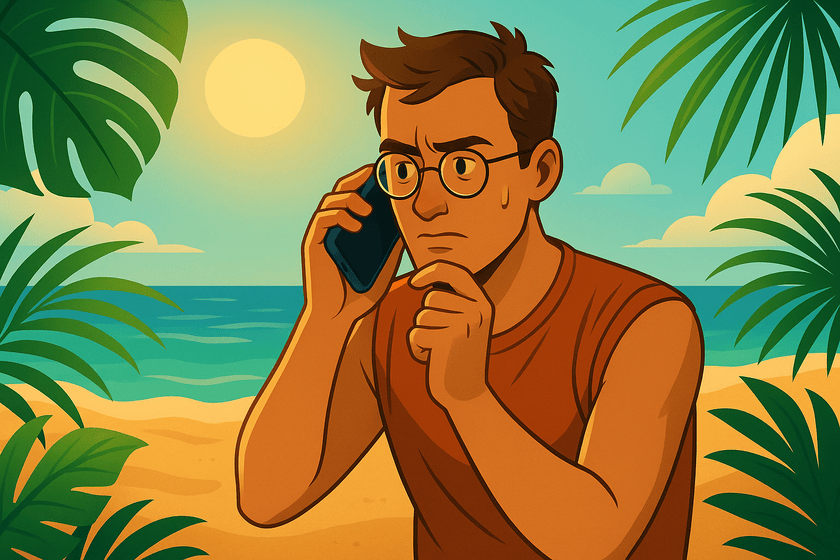

(*AI-generated image*)


#### Twoim celem będzie przeanalizowanie i przetworzenie zbioru danych w taki sposób, by mógł on być użyty do nauki modelu do klasyfikacji każdego pasażera Titanica jako ofiary (0) lub osoby, która przeżyła (1).

(Uwaga: w tym zadaniu nie będziesz trenować modeli, ta przyjemność spotka cię w następnych notebookach)

Poniżej znajdziesz pytania, które mogą być pomocne w analizie, oraz odwołania do poszczególnych sekcji z notebooka do lekcji:

- Czy wszystkie kolumny są istotne w kontekście zadania?
- Czy występują brakujące wartości? Jeśli tak, to jak je uzupełnisz? (sekcja #2.1)
- Czy typy danych są odpowiednie do znaczenia kolumny? (sekcja #1.3)
- Czy dystrybucje danych mają rozkłady normalne, czy asymetryczne? (sekcja #4.1 + wykład)
- Która zmienna oznacza predykowaną klasę?
- Jaki jest rozkład zmiennej predykowanej względem zmiennych kategorialnych, jak i numerycznych? (sekcja #4.1)
- Czy końcowe rozkłady zawierają wartości skrajne? (sekcja #4.2 + wykład)

Wymagania:

- Zbiór musi być oczyszczony, tj. finalnie nie powinien mieć brakujących wartości (sekcja #2.1)
- Zbiór musi zawierać co najmniej dwie dodatkowe kolumny, które mogą wzbogacić informacje zawarte w zbiorze (sekcje #1.5 i #2.2)
- Cechy kategorialne powinny być zakodowane, postaraj się dobrać odpowiedni sposób (sekcja #2.3)
- Zbadaj, czy występują skrajne wartości (outliery) zarówno dla wartości numerycznych, jak i dla kategorialnych
- Każda cecha powinna być zwizualizowana co najmniej raz. Sam(a) zastanów się, czy warto wizualizować cechy parami w celu odkrycia zależności między nimi (sekcja #4.4)
- Nie ma ograniczenia na liczbę komórek, ale zastanów się, czy dana wizualizacja/obliczenie jest przydatne w całej analizie, czy po prostu sobie "egzystuje" bez żadnych wniosków

Zadbaj o czytelność kodu i nazewnictwo zmiennych. Jeśli jakiś wycinek kodu się powtarza, to wyodrębnij go do funkcji. Postaraj się zamieszczać swoje wnioski w postaci komentarza `Markdown`.

Poniżej zamieszczamy tabelę z wyjaśnieniem poszczególnych kolumn:

| Kolumna      | Opis                                                                            |
| ------------ | ------------------------------------------------------------------------------- |
| **Survived** | Czy pasażer przeżył (0 = nie, 1 = tak).                                         |
| **Pclass**   | Klasa podróży (1 = I klasa, 2 = II klasa, 3 = III klasa).                       |
| **Name**     | Imię i nazwisko pasażera.                                                       |
| **Sex**      | Płeć pasażera (male = mężczyzna, female = kobieta).                             |
| **Age**      | Wiek pasażera w latach.                                                         |
| **SibSp**    | Liczba rodzeństwa i małżonków na pokładzie.                                     |
| **Parch**    | Liczba rodziców i dzieci na pokładzie.                                          |
| **Ticket**   | Numer biletu.                                                                   |
| **Fare**     | Cena biletu.                                                                    |
| **Cabin**    | Numer kabiny pasażera                                     |
| **Embarked** | Port, w którym pasażer wsiadł (C = Cherbourg, Q = Queenstown, S = Southampton). |
                                                         |


In [824]:
titanic_df = pd.read_csv(base_path/'titanic.csv',index_col='PassengerId')

In [825]:
titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# Na początku możemy usunąć kolumny, które nie są nam w ogóle potrzebne w kontekście podanego zadania

In [826]:
better_Titanic=titanic_df.drop(["Name","Ticket","Cabin"],axis = "columns")
better_Titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,NaN,1,2,23.4500,S


In [827]:
better_Titanic.dtypes


,0
Survived,int64
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,object


# Zmieniłem typ dla wieku

In [828]:
better_Titanic = better_Titanic.convert_dtypes()
better_Titanic['Age'] =better_Titanic['Age'].astype(pd.Int64Dtype())
better_Titanic.dtypes

,0
Survived,Int64
Pclass,Int64
Sex,string[python]
Age,Int64
SibSp,Int64
Parch,Int64
Fare,Float64
Embarked,string[python]


In [829]:
better_Titanic.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,98
Embarked,2


Widzimy, że w kolumnie Age brakuje 177 wystąpień a w Cenie Biletów brakuje 98 wystąpień i w portach brakuje 2 wystąpień.


In [830]:
def get_column_distribution(df,column):
  return df[column].value_counts(normalize=True)
def function_for_filling_missing(df,column):
  titanic_count_prob = get_column_distribution(df,column)
  titanic_count_age = titanic_count_prob.values
  titanic_count_index = titanic_count_prob.index
  missing_titanic_age = better_Titanic[column].isna()
  better_Titanic.loc[missing_titanic_age, column] = np.random.choice(titanic_count_index,size=missing_titanic_age.sum(),p=titanic_count_age)

# Uzupełniamy brakujące wystąpienia w kolumnie 'Age' i 'Fare' poprzez losowanie wartości z istniejącego rozkładu. Natomiast w kolumnie 'Embarked' mamy tylko dwie brakujące wartości więc po prostu dodamy dwie najpopularniejsze opcje i powinno to spełnić swoje zadanie czyli dominantą.

In [831]:
function_for_filling_missing(better_Titanic,'Age')
function_for_filling_missing(better_Titanic,'Fare')
dominanta_embarked=better_Titanic['Embarked'].mode()[0]
better_Titanic['Embarked'].fillna(dominanta_embarked,inplace=True)
better_Titanic.isna().sum()

/tmp/ipython-input-1174197656.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  better_Titanic['Embarked'].fillna(dominanta_embarked,inplace=True)


,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


#Udało się uzupełnić wszystkie brakujące wartości w kolumnach ;)


In [832]:
better_Titanic['Sex'] = better_Titanic['Sex'].map({'male':1,'female':0})
get_column_distribution(better_Titanic,'Embarked')


,proportion
Embarked,
S,0.725028
C,0.188552
Q,0.08642


#Zakodowaliśmy płeć jako 0 i 1 i sprawdziłem rozkład portów

In [833]:
better_Titanic['Embarked'] = better_Titanic['Embarked'].map({'S':0,'C':1,'Q':2})
better_Titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22,1,0,7.25,0
2,1,1,0,38,1,0,71.2833,1
3,1,3,0,26,0,0,7.925,0
4,1,1,0,35,1,0,53.1,0
5,0,3,1,35,0,0,8.05,0
...,...,...,...,...,...,...,...,...
887,0,2,1,27,0,0,13.0,0
888,1,1,0,19,0,0,30.0,0
889,0,3,0,20,1,2,23.45,0


#Dodamy kolumny, które mogą pomóć w analizie osób, które przeżyły katastrofe Titanica. Na początek mam taki pomysł aby dodać trzy kolumny:


#1. Family, która będzie trzyma informacje o tym ile osób z rodziny danej osoby było na pokładzie Titanica

In [834]:
better_Titanic['Family']=better_Titanic['SibSp'] + better_Titanic['Parch']

#2. Price_higher, która będzie miała wartość 1 jeśli cena biletu zapłaconego przez daną osobę była wyższa niż średnia cena za bilet

In [835]:
avg_ticket_price = better_Titanic['Fare'].mean()
is_higher = better_Titanic['Fare']>=avg_ticket_price
better_Titanic['Price_higher']=0
better_Titanic.loc[is_higher,'Price_higher']=1


#3. Kid, która będzie miała wartość 1 jeśli osoba ma poniżej 18 roku życia a 0 jeśli poniżej

In [836]:
is_kid = better_Titanic['Age']<=18
better_Titanic['Kid']=0
better_Titanic.loc[is_kid,'Kid']=1
better_Titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Price_higher,Kid
PassengerId,,,,,,,,,,,
1,0,3,1,22,1,0,7.25,0,1,0,0
2,1,1,0,38,1,0,71.2833,1,1,1,0
3,1,3,0,26,0,0,7.925,0,0,0,0
4,1,1,0,35,1,0,53.1,0,1,1,0
5,0,3,1,35,0,0,8.05,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,1,27,0,0,13.0,0,0,0,0
888,1,1,0,19,0,0,30.0,0,0,0,0
889,0,3,0,20,1,2,23.45,0,3,0,0


#Sprawdźmy czy występują skrajne wartości. Dobre to tego boxplot charts

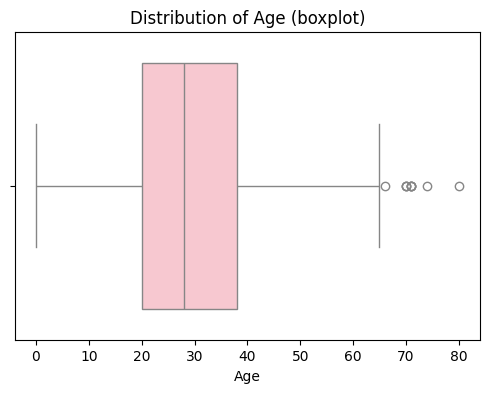

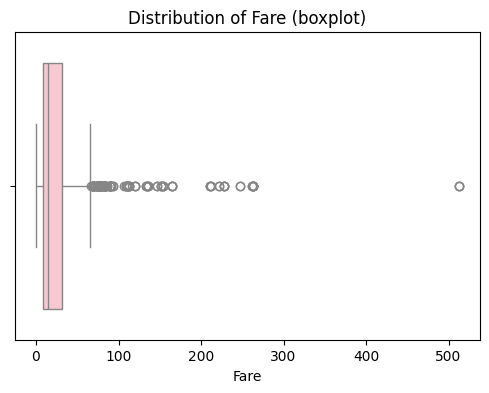

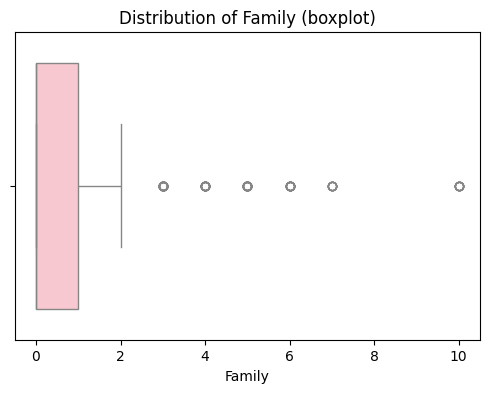

In [837]:
def boxplot_charts(df,column):
  plt.figure(figsize=(6, 4))
  sns.boxplot(x=column,data=df, color='pink')
  plt.title(f"Distribution of {column} (boxplot)")
  plt.show()
boxplot_charts(better_Titanic,'Age')
boxplot_charts(better_Titanic,'Fare')
boxplot_charts(better_Titanic,'Family')

Wykresy mają wartości skrajne ale przynjamniej u mnie nie wzbudzają one jakiś wielkich podejrzeń. Mogły się zdarzyć osoby w podeszłym wieku na statku, mogła się też zdarzyć ponad 10 osobowe rodziny i dystrybucja cen biletów też wygląda rozsądnie.

#Spróbujemy zwizualizować cechy parami, żeby sprawdzić czy są jakieś zależności

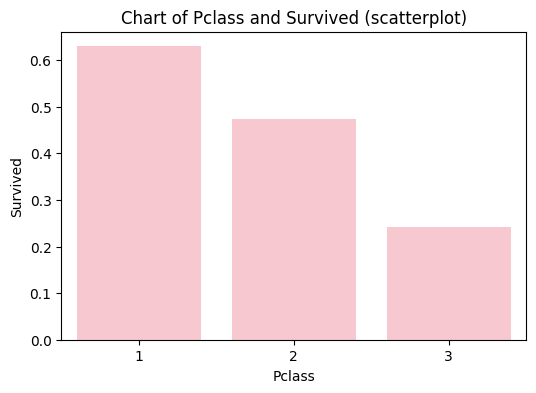

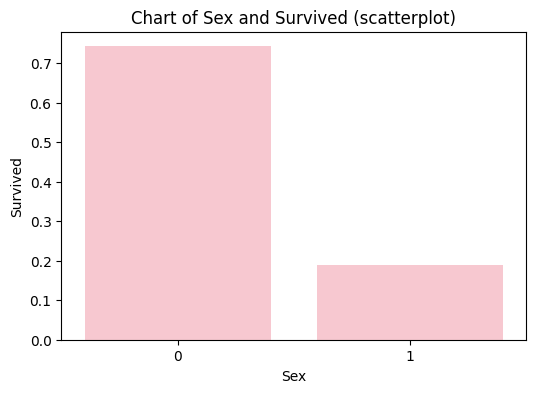

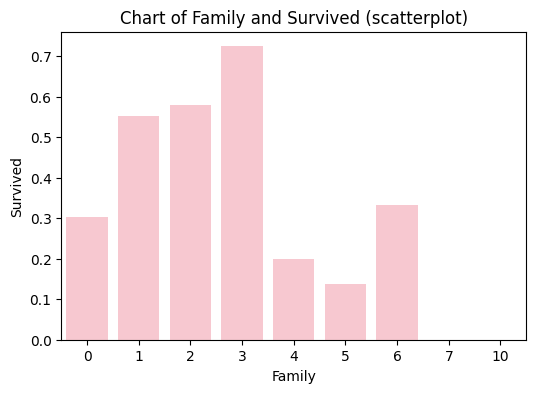

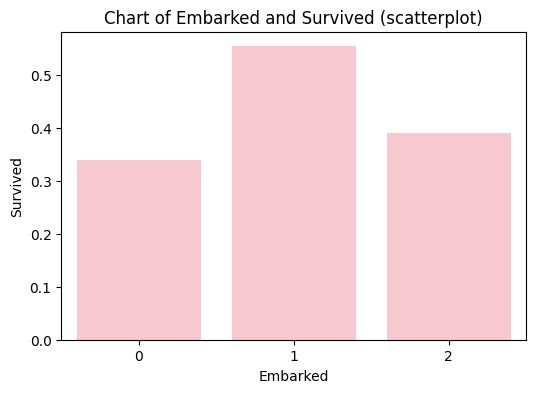

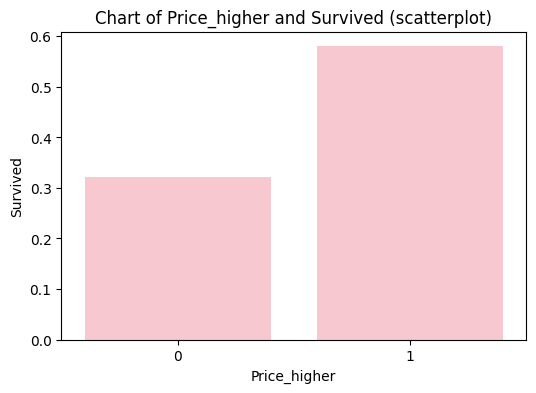

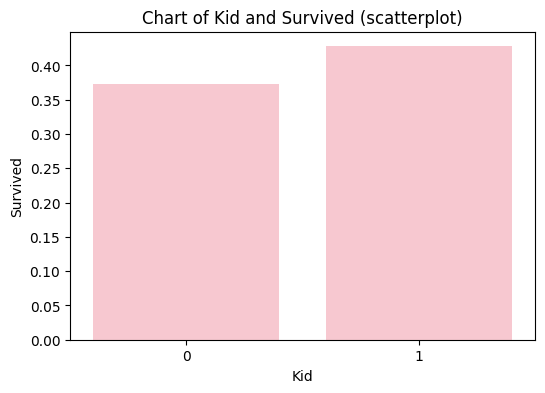

In [838]:
def barplot_chart(df,x,y):
  plt.figure(figsize=(6, 4))
  sns.barplot(x=x,y=y,data=df, color='pink',errorbar=None)
  plt.title(f"Chart of {x} and {y} (scatterplot)")
  plt.xlabel(x)
  plt.ylabel('Survived')
  plt.show()

for x in ['Pclass', 'Sex','Family', 'Embarked','Price_higher','Kid']:
  barplot_chart(better_Titanic,x,'Survived')

Wnioski z wykresów:
1. Największe szansę na przeżycie miało się podróżując w 1 - klasie.
2. Kobiety miały przeżywalność na poziomie 70%.
3. Największe szansę na przeżycie miały osoby, które na pokładzie Titanica miały jeszcze 3 osoby z rodziny. Ważne jest jeszcze to, że rodziny liczące 8 osób lub więcej w ogólne nie przeżyły katastrofy.
4. Największe szansę na przeżycie miało się, jeśli wsiadło się w porcie 'C'.
5. Osoby z droższymi biletami od średniej ceny biletu miały dwa razy wiekszą przeżywalność katastrofy.
6. Dzieci miały nieco większe szanse na przeżycie niż dorośli.

#Heatmapa


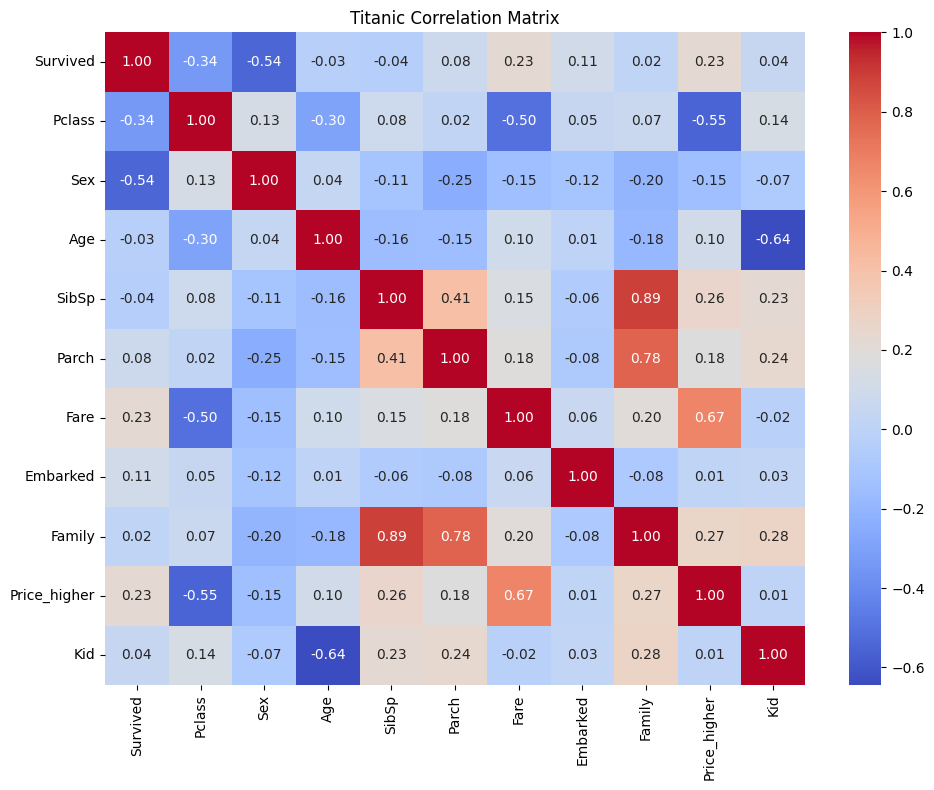

In [839]:
def heatmap_chart(df):
  corr = df.corr(numeric_only=True)
  plt.figure(figsize=(10, 8))
  sns.heatmap(corr, annot=True,fmt = ".2f",cmap='coolwarm')
  plt.title('Titanic Correlation Matrix')
  plt.tight_layout()
  plt.show()
heatmap_chart(better_Titanic)

#Nie wiele ciekawych informacji widze na tym wykresie :(


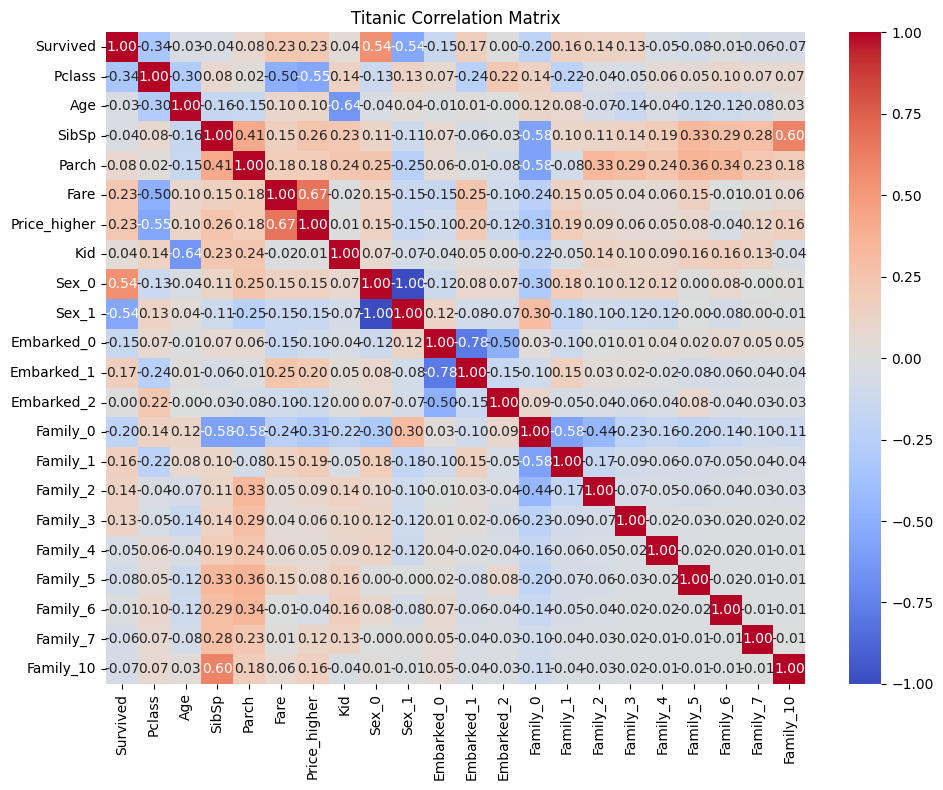

In [840]:
better_Titanic=pd.get_dummies(better_Titanic,columns=['Sex','Embarked','Family'])
heatmap_chart(better_Titanic)

# Co zobaczyłem ciekawego:
0.30 - dla mężczyzn bez żadnej rodziny na pokładzie
#Więcej nic ciekawego nie widze